In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
import os

In [3]:

df = pd.read_csv('/supermarket_sales - Sheet1.csv')
df.shape

(1000, 17)

In [4]:
# drop NAN values
 
nan_df = df[df.isna().any(axis=1)]
nan_df.head()
 


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [5]:
df.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [6]:
# adding a month column

df["Date"]= pd.to_datetime(df["Date"])
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df['Month'] = df['Date'].astype(str).str[5:7]
df['Month'] = df['Month'].astype('int32')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


In [8]:
df.sort_values(by='Rating', ascending = False)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
387,725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.1600,339.3600,2019-02-20,16:49,Credit card,323.20,4.761905,16.1600,10.0,2
159,423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.0170,588.3570,2019-03-27,19:18,Ewallet,560.34,4.761905,28.0170,10.0,3
853,866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.3950,554.2950,2019-02-25,11:58,Ewallet,527.90,4.761905,26.3950,10.0,2
62,347-34-2234,B,Mandalay,Member,Female,Sports and travel,55.07,9,24.7815,520.4115,2019-02-03,13:40,Ewallet,495.63,4.761905,24.7815,10.0,2
60,285-68-5083,C,Naypyitaw,Member,Female,Sports and travel,24.74,3,3.7110,77.9310,2019-02-15,17:47,Credit card,74.22,4.761905,3.7110,10.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,182-69-8360,B,Mandalay,Normal,Female,Electronic accessories,23.65,4,4.7300,99.3300,2019-01-30,13:32,Credit card,94.60,4.761905,4.7300,4.0,1
848,845-94-6841,C,Naypyitaw,Member,Female,Food and beverages,72.88,9,32.7960,688.7160,2019-01-08,19:38,Cash,655.92,4.761905,32.7960,4.0,1
643,131-15-8856,C,Naypyitaw,Member,Female,Food and beverages,72.52,8,29.0080,609.1680,2019-03-30,19:26,Credit card,580.16,4.761905,29.0080,4.0,3
328,730-61-8757,B,Mandalay,Member,Male,Health and beauty,51.13,4,10.2260,214.7460,2019-01-25,10:11,Credit card,204.52,4.761905,10.2260,4.0,1


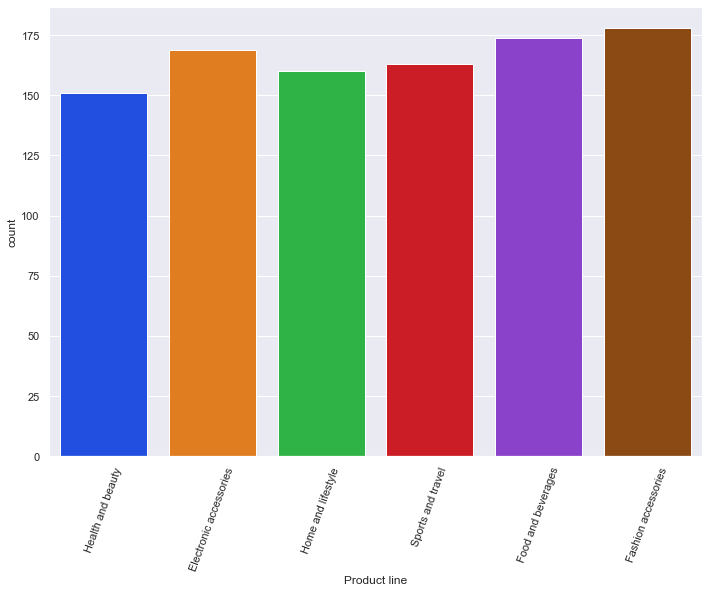

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df_top = df[df['Rating']<10]

# plot 
sns.set(rc={'figure.figsize':(11.7,8.27)})
chart = sns.countplot(x = 'Product line', 
            data = df_top, 
             palette = 'bright')
chart.set_xticklabels(chart.get_xticklabels(), rotation=70)

plt.show()

In [10]:
# best month for sales

df_total_month= df.groupby('Month', as_index=False).sum()
df_total_month


,Month,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,1,19753.89,1965,5537.708,116291.868,110754.16,1676.190476,5537.708,2470.2
1,2,17159.52,1654,4629.494,97219.374,92589.88,1442.857143,4629.494,2142.6
2,3,18758.72,1891,5212.167,109455.507,104243.34,1642.857143,5212.167,2359.9


In [11]:
# The best month
# January seems to be the best month of the year. 

In [12]:
df_total = df.groupby(['Total'], as_index=False).sum()
df_total

,Total,Unit price,Quantity,Tax 5%,cogs,gross margin percentage,gross income,Rating,Month
0,10.6785,10.17,1,0.5085,10.17,4.761905,0.5085,5.9,2
1,12.6945,12.09,1,0.6045,12.09,4.761905,0.6045,8.2,1
2,13.1670,12.54,1,0.6270,12.54,4.761905,0.6270,8.2,2
3,13.4190,12.78,1,0.6390,12.78,4.761905,0.6390,9.5,1
4,14.6790,13.98,1,0.6990,13.98,4.761905,0.6990,9.8,2
...,...,...,...,...,...,...,...,...,...
985,1022.4900,97.38,10,48.6900,973.80,4.761905,48.6900,4.4,3
986,1023.7500,97.50,10,48.7500,975.00,4.761905,48.7500,8.0,1
987,1034.4600,98.52,10,49.2600,985.20,4.761905,49.2600,4.5,1
988,1039.2900,98.98,10,49.4900,989.80,4.761905,49.4900,8.7,2


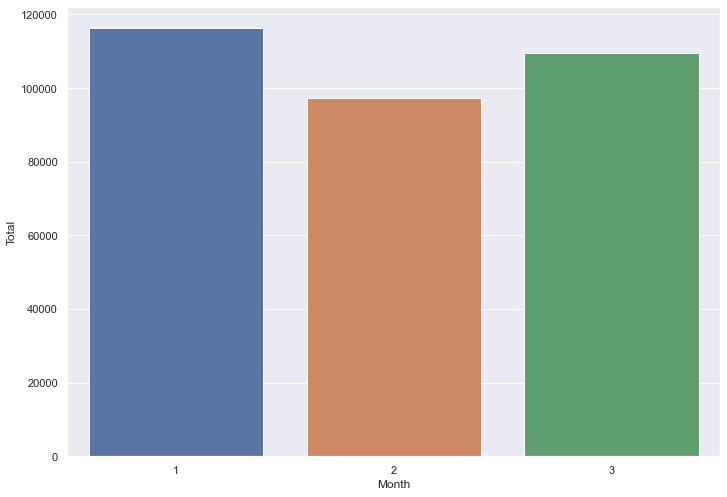

In [13]:
# plot the data
sns.barplot(x = df_total_month['Month'], y = df_total_month['Total'], ci = None)
plt.show()

In [14]:
df_city= df.groupby('City', as_index = False).sum()
df_city

,City,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
0,Mandalay,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6,665
1,Naypyitaw,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9,640
2,Yangon,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2,688


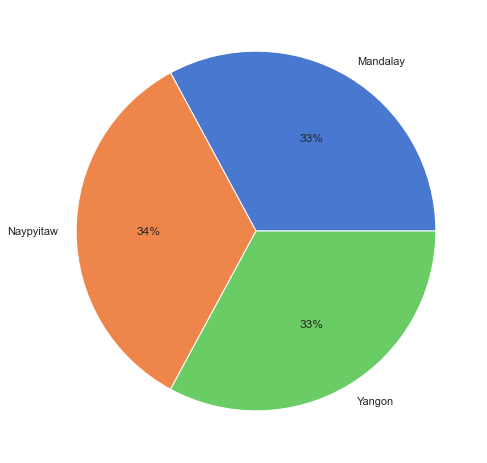

In [15]:
colors = sns.color_palette('muted')[0:5]

#create pie chart
plt.pie(df_city['Total'], labels = df_city['City'], colors = colors , autopct='%.0f%%')
plt.show()

In [16]:
# Naypyitaw is the city with highest sells among the three cities. 

In [17]:
import statistics

mean = statistics.mean(df['Total'])
variance = statistics.variance(df['Total'])
stdv  = statistics.stdev(df['Total'])
print(mean, stdv, variance)

322.966749 245.88533510097184 60459.59801771722


In [18]:
df_product_line = df.groupby('Product line').sum()
df_product_line.head()



,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
Product line,,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2,348
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2,346
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7,348
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5,312
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0,324


c:\Users\jairo\anaconda3\envs\pythonProject1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


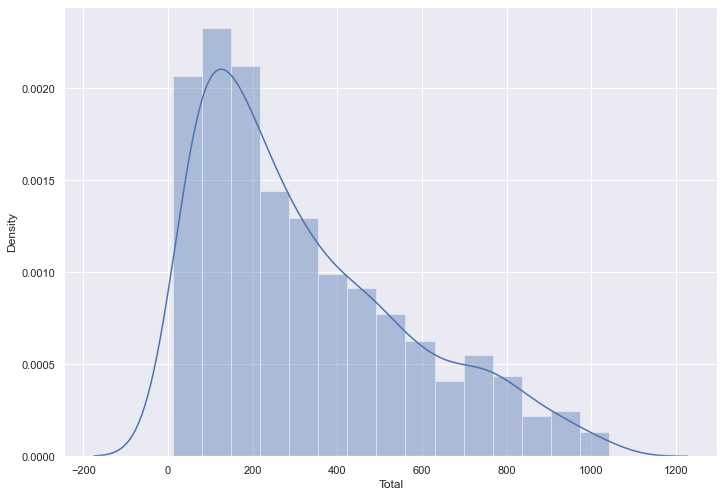

In [19]:
ax = sns.distplot(df['Total'])



In [20]:

cov = np.cov(df['Total'], df['gross margin percentage'])
cov

array([[60459.59801772,     0.        ],
       [    0.        ,     0.        ]])

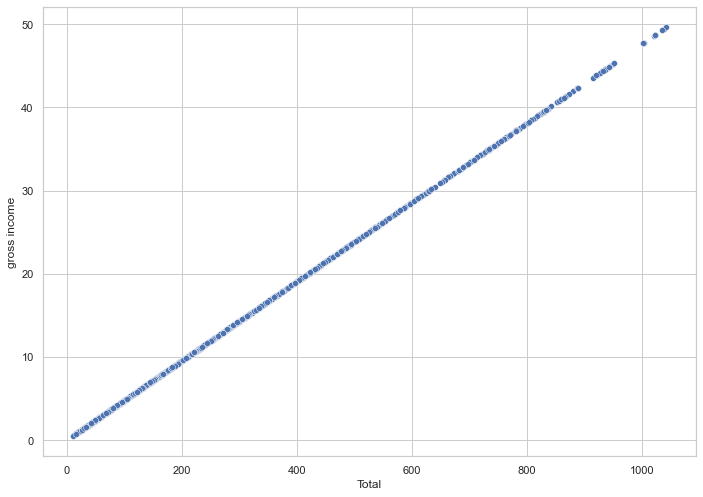

In [21]:
sns.set_theme(style="whitegrid")
sns.scatterplot(data=df, x="Total", y="gross income")
plt.show()

In [22]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month'],
      dtype='object')

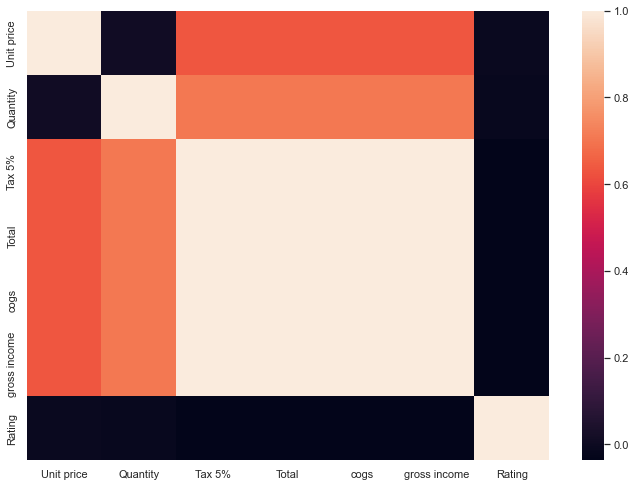

In [23]:
features =  ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross income','Rating']
sns.set_theme(style="whitegrid") 
sns.heatmap(df[features].corr()) # generate heatmap containing correlation
# coefficients 
plt.show() # show figure

<AxesSubplot:xlabel='Gender', ylabel='Count'>

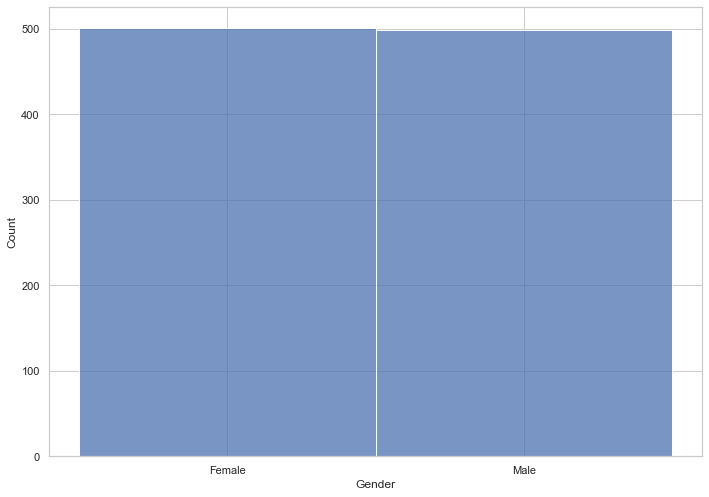

In [24]:
sns.histplot(df, x = df['Gender'], bins = 100)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour,Minute
0,750-67-8428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-06-04 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,13,8
1,226-31-3081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-06-04 10:29:00,Cash,76.40,4.761905,3.8200,9.6,3,10,29
2,631-41-3108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-06-04 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,13,23
3,123-19-1176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-06-04 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1,20,33
4,373-73-7910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-06-04 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2,10,37


In [25]:
df.loc[df["Gender"] == "Male", 'Gender'] = 1
df.loc[df['Gender'] == 'Female', 'Gender'] = 0

In [26]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3
2,631-41-3108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3
3,123-19-1176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


In [27]:
new_df = df.groupby('Gender', as_index=False).sum()
new_df

,Gender,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
0,0,27687.24,2869,7994.425,167882.925,159888.50,2385.714286,7994.425,3489.2,987
1,1,27984.89,2641,7384.944,155083.824,147698.88,2376.190476,7384.944,3483.5,1006


([<matplotlib.patches.Wedge at 0x25015fa16d0>,
 [Text(-0.0684309861348343, 1.097869391201255, 'Male'),
  Text(0.0684308833448829, -1.0978693976082217, 'Female')],
 [Text(-0.03732599243718234, 0.598837849746139, '52.0%'),
  Text(0.03732593636993612, -0.598837853240848, '48.0%')])

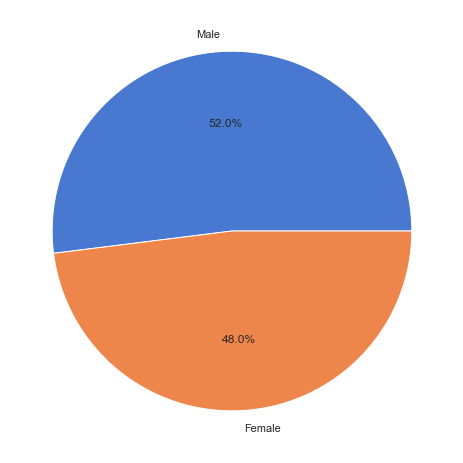

In [52]:
labels = ['Male', 'Female']
plt.pie(new_df['Total'], labels = labels, colors = colors, autopct='%1.1f%%')

In [29]:
df['Total'].std()

245.88533510097187

In [30]:
df['Unit price'].mean()


55.67213

In [31]:
df['Unit price'].std()

26.49462834791978

In [32]:
print(df['Unit price'].min(), df['Unit price'].max())

10.08 99.96


In [33]:
print(df['Quantity'].mean(), df['Quantity'].min(), df['Quantity'].max())

5.51 1 10


In [34]:
# df.groupby('Unit price').apply(lambda x: np.average(x.quantity, weights=x.Total))

<AxesSubplot:xlabel='Product line', ylabel='Count'>

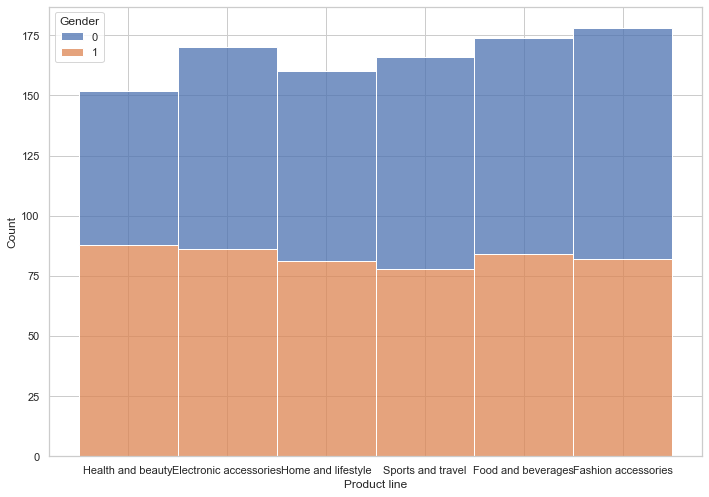

In [35]:
sns.histplot(df, x = 'Product line', hue = df['Gender'], multiple = 'stack', bins = 0)

<AxesSubplot:xlabel='gross income', ylabel='Density'>

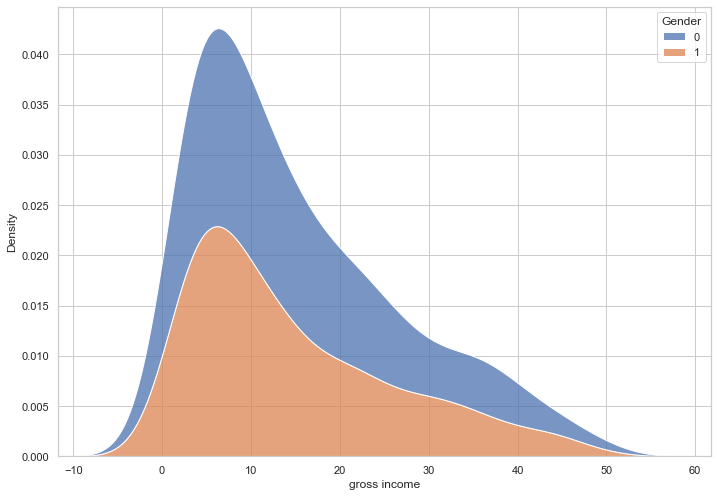

In [36]:
sns.kdeplot(data=df, x="gross income", hue=df['Gender'], \
	multiple="stack")

<AxesSubplot:xlabel='Product line', ylabel='Total'>

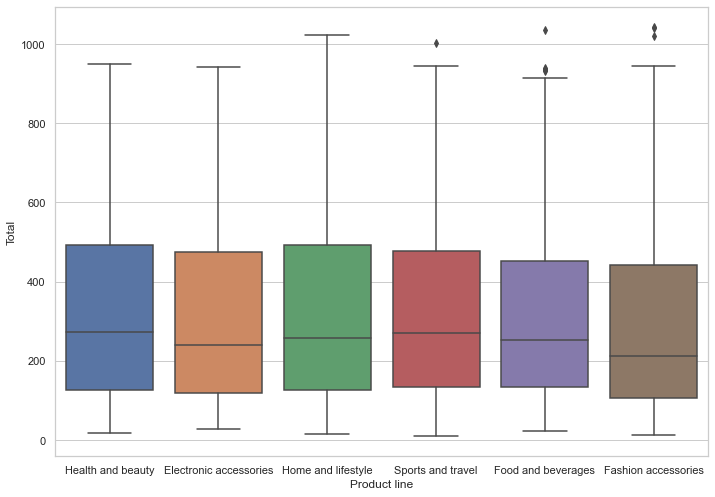

In [37]:
sns.boxplot(x="Product line", y="Total", data=df)

In [38]:
df['Time'] = pd.to_datetime(df['Time'])

In [39]:
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour,Minute
0,750-67-8428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-06-04 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,13,8
1,226-31-3081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-06-04 10:29:00,Cash,76.40,4.761905,3.8200,9.6,3,10,29
2,631-41-3108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-06-04 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,13,23
3,123-19-1176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-06-04 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1,20,33
4,373-73-7910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-06-04 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2,10,37


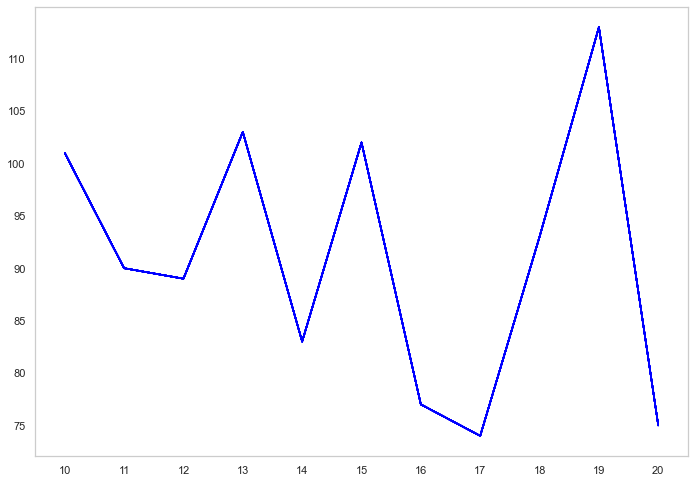

In [40]:
hours = [hour for hour, df in df.groupby('Hour')]

plt.plot( hours, df.groupby('Hour').count(), color = 'blue')
plt.xticks(hours)

plt.grid()
plt.show()


In [44]:
df_new_duplicates = df[df['Invoice ID'].duplicated(keep = False)]
df_new_duplicates

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour,Minute


In [42]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour,Minute
0,750-67-8428,A,Yangon,Member,0,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2022-06-04 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,13,8
1,226-31-3081,C,Naypyitaw,Normal,0,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2022-06-04 10:29:00,Cash,76.40,4.761905,3.8200,9.6,3,10,29
2,631-41-3108,A,Yangon,Normal,1,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2022-06-04 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,13,23
3,123-19-1176,A,Yangon,Member,1,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2022-06-04 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,1,20,33
4,373-73-7910,A,Yangon,Normal,1,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2022-06-04 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2,10,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,1,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2022-06-04 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,1,13,46
996,303-96-2227,B,Mandalay,Normal,0,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2022-06-04 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,3,17,16
997,727-02-1313,A,Yangon,Member,1,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2022-06-04 13:22:00,Cash,31.84,4.761905,1.5920,7.7,2,13,22
998,347-56-2442,A,Yangon,Normal,1,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2022-06-04 15:33:00,Cash,65.82,4.761905,3.2910,4.1,2,15,33
